In [1]:
##Library Imports

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [8]:
# Load the dataset
data = pd.read_csv('/Users/hamzehhammad/Downloads/housing_data/housing.csv')

# Print first rows
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

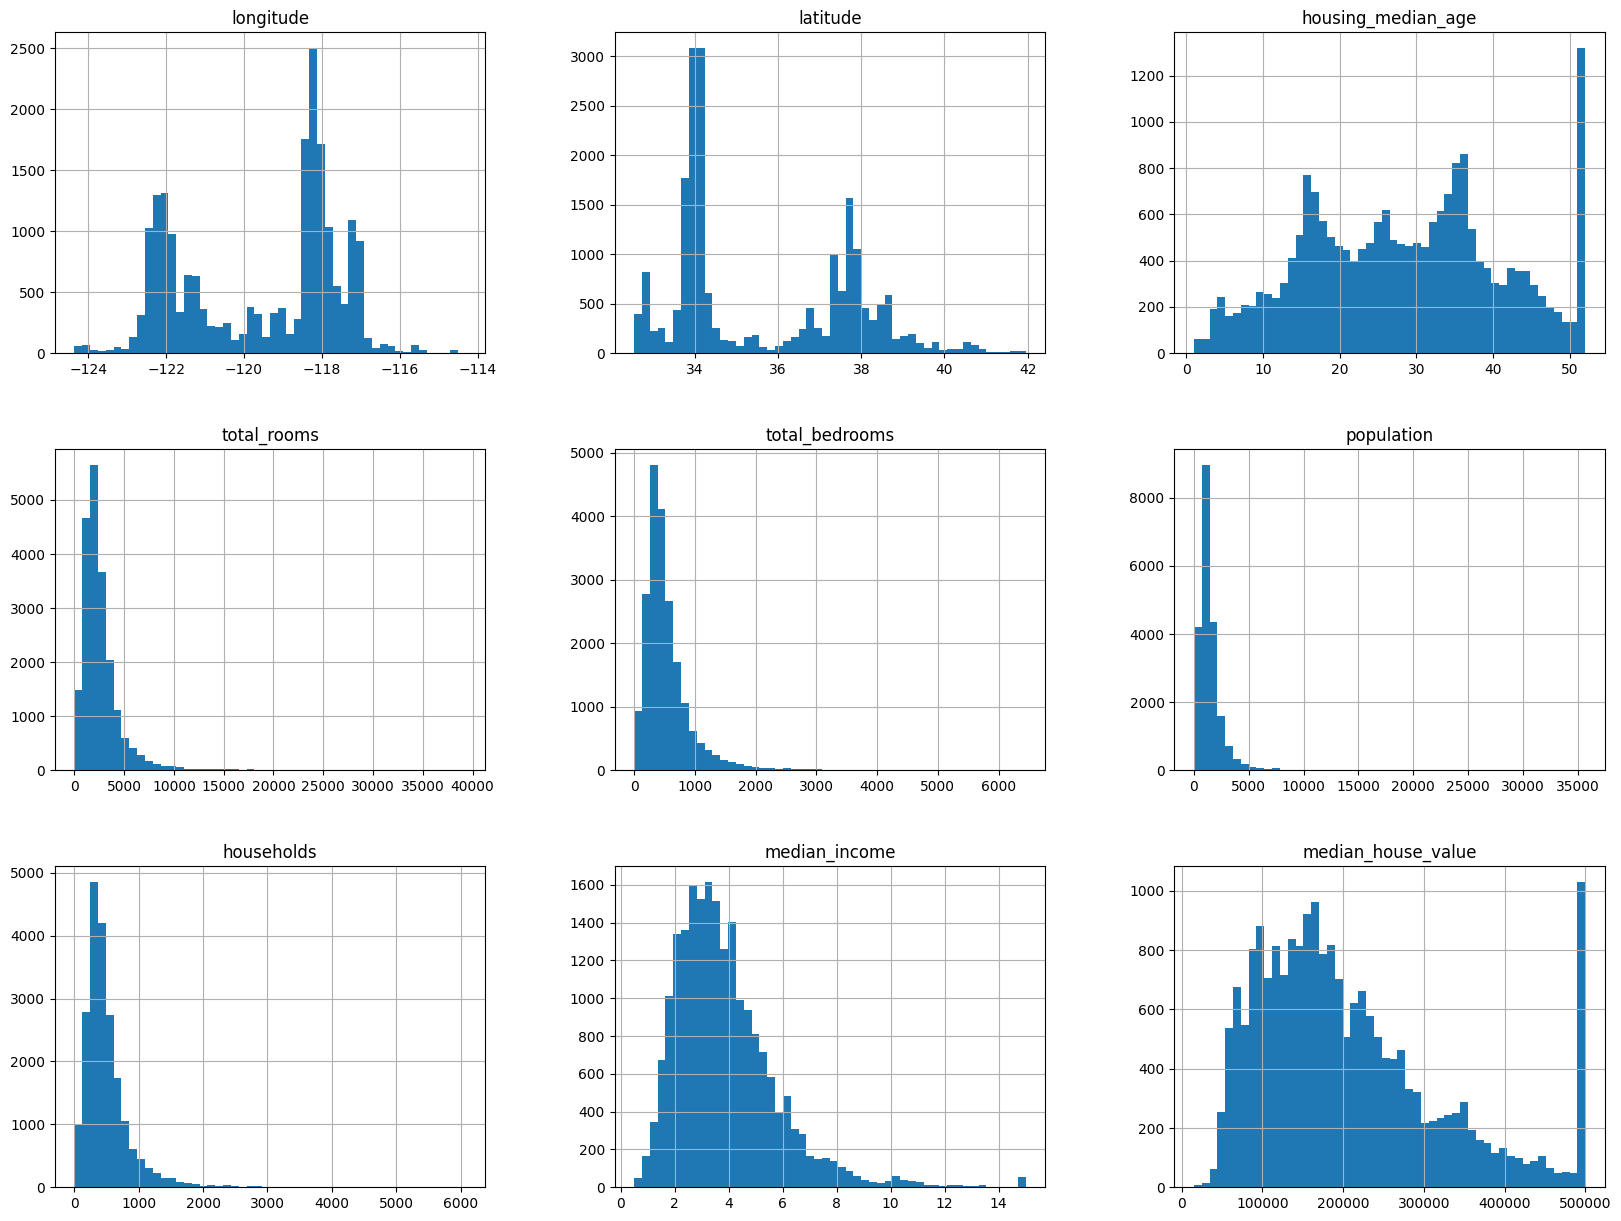

In [9]:
# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Histograms of the features
data.hist(bins=50, figsize=(20,15))
plt.show()


In [12]:
# Fill missing values, if any
data.fillna(method='ffill', inplace=True)

# Convert categorical variable 'Ocean Proximity' into dummy/indicator variables
data = pd.get_dummies(data)

# Feature and target separation
X = data.drop('median_house_value', axis=1)  # Correct column name in lowercase
y = data['median_house_value']              # Correct column name in lowercase

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/var/folders/dn/1c_hlkwn0kbfnl5bq8pmt52r0000gn/T/ipykernel_6048/148697275.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Initialize and fit the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [16]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Valid options for max_features
    'max_depth': [4, 5, 6, 7, 8]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_scaled, y_train)
print("Best parameters:", CV_rfc.best_params_)


Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model with the best parameters
model = RandomForestRegressor(n_estimators=200, max_features='sqrt', max_depth=8, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3639176649.377253
R^2 Score: 0.7222869569878478


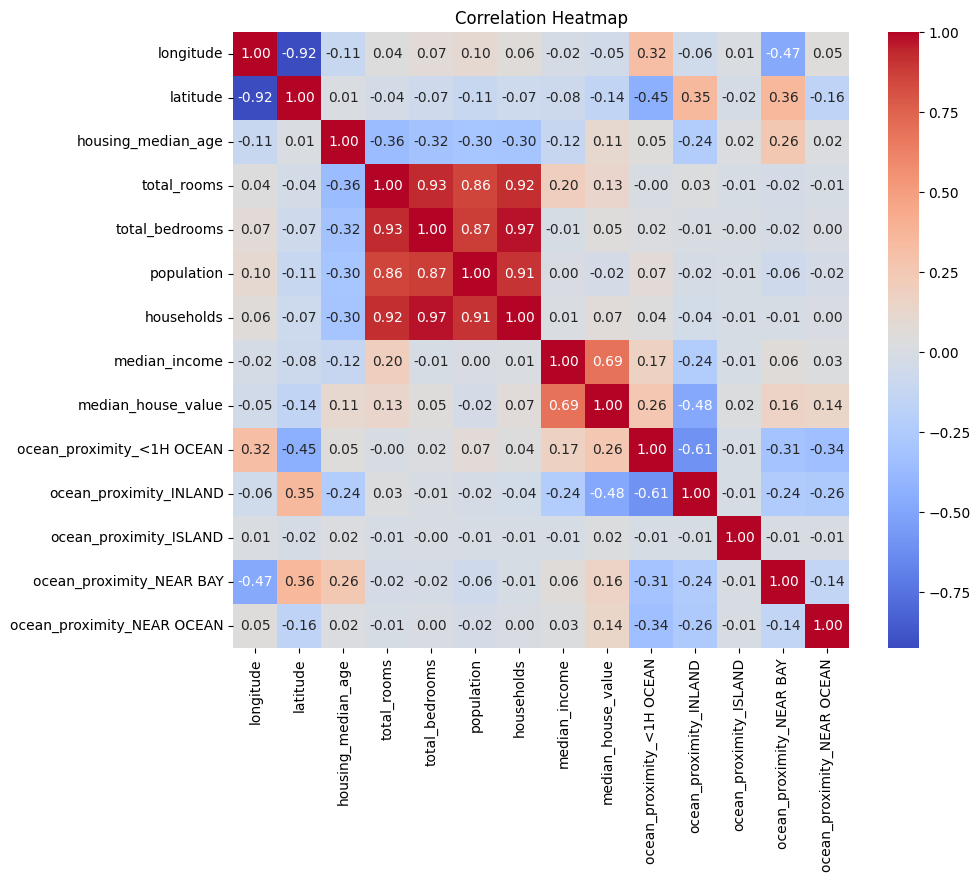

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

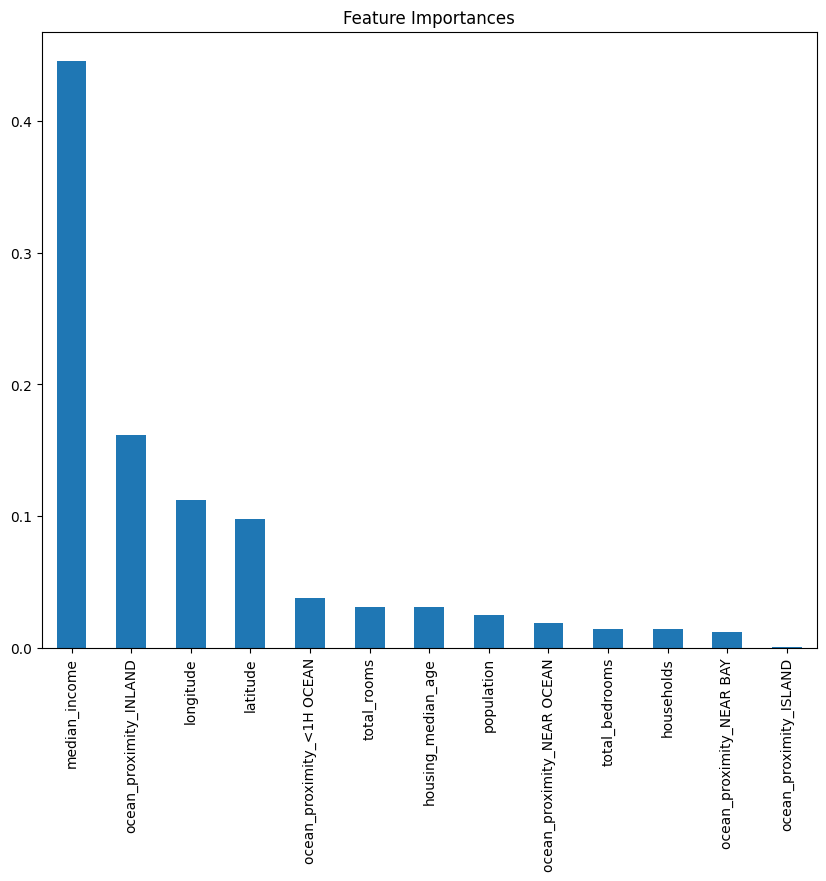

In [19]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
feature_importances['importance'].plot(kind='bar')
plt.title('Feature Importances')
plt.show()

Report: 

Project Report: Californian Housing Price Prediction


My project aimed to predict median house prices for California block groups using previously collected socio-economic and demographic data. The dataset comprises 20,640 observations with ten total attributes (median income, housing age, population, and ocean proximity, offering a rich dataset for predictive modeling). 
Our solution was a supervised machine learning approach, making use of a RandomForestRegressor thanks to its ability to handle non-linear relationships effectively. We also required a fair amoount of preprocessing steps to ensure the quality of work. Preprocessing steps included handling missing values, encoding categorical variables, and feature scaling to standardize the data.
Our model was trained on an 80/20 split of training and testing data. Hyperparameter tuning through GridSearchCV identified the optimal parameters as 200 trees , a maximum depth of 8 , and using the square root of features for each split. Model performance was evaluated using Mean Squared Error and R-squared.

The final model achieved a R-squared value of 0.722. The correlation heatmap showed strong positive correlations between median income and median house value, as well as the proximity to the ocean. This suggests that median income and ocean proximity are the most influential factors in predicting house prices.
The RandomForestRegressor model demonstrated robust performance in predicting housing prices, with median income and ocean proximity emerging as significant predictors. The correlation heatmap confirmed the importance of these factors, reinforcing their influence on house prices. Further enhancements could include deeper analysis of feature interactions and exploration of advanced modeling techniques to improve predictive accuracy.